# Part 1

## 1.1 Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# plt.style.use(['science', 'no-latex'])

In [3]:
def generate_sin_data(sigma, N):
    """
    Function to generate X data from a uniform distribution and corresponding y data with normal errors.

    Parameters
    ----------
    sigma : float 
        standard deviation of normal errors
    N : int
        number of data points

    Returns
    -------
    X : ndarray
        input data
    y : ndarray
        corresponding output data with normal error term

    """
    X = np.random.uniform(0,1,N) 
    y = np.sin(2*np.pi*X)**2 + np.random.normal(0,sigma,N)
    return X, y

In [28]:
def poly_feature_space(X, k):
    """
    Function to create the polynomial feature space.
    The function loops through all x applying polynomial basis of order to each data point.
    The matrix rows correpsond to the ith data point.
    The matrix columns correspond to the jth polynomial basis function.

    Parameters
    ----------
    X : ndarray
        input data
    k : int
        polynomial basis order

    Returns
    -------
    phi : ndarray
        polynomial feature space of order k

    """

    # feature space matrix of dimension {len(X),k}
    phi = np.stack([X**i for i in range(k)], axis=1)
    return phi

In [65]:
def optimal_weights(phi, y):
    """
    Function to obtain the optimal weights.
    The function performs the matrix operation (phi^T*phi)^-1*phi^T*y and returns the result.

    Parameters
    ----------
    phi : ndarray
        feature space
    y : ndarray
        output data of dimensions {1, n}

    Returns
    -------
    Array of optimal weights: ndarray

    """
    # utilise numpys built-in inverse function to complete matrix operation
    return phi.T @ np.linalg.pinv(phi@phi.T) @ y # np.linalg.inv(phi.T@phi)@phi.T@y

In [66]:
def fit_poly(w, X):
    """
    Function to produce fitted y data applying the optimal weights to the corresponding basis function.

    Parameters
    ----------
    w : ndarray
        optimal weights
    X : ndarray
        input data

    Returns
    -------
    Array of fitted y values: ndarray

    """
    
    # creating an array of predicted values using optimised weights to scale polynomial elements
    return np.squeeze(poly_feature_space(X, w.size) @ w)

In [67]:
def sin_feature_space(X, k):
    """
    Function to create the sine feature space.
    The function loops through all x applying sine basis of order k to each data point.
    The matrix rows correspond to the ith data point.
    The matrix columns correspond to the jth order sine basis function.

    Parameters
    ----------
    X : ndarray
        input data
    k : int
        sine basis order

    Returns
    -------
    phi : ndarray
        sine feature space of dimensions {len(X), k}

    """

    # feature space matrix
    phi = np.stack([np.sin(i*2*np.pi*X) for i in range(1, k+1)], axis=1)
    return phi

In [68]:
def fit_sin(w, X):
    """
    Function to produce fitted y data applying the optimal weights to the corresponding basis function.

    Parameters
    ----------
    w : optimal weights
    X : X data

    Returns
    -------
    Vector of fitted y values

    """

    return np.squeeze(sin_feature_space(X, w.size) @ w)

In [69]:
def linear_regression(X, y, k, feature_space):
    """
    Function to build a feature space and find the optimal weights of each basis.

    Parameters
    ----------
    X : ndarray
        X data
    y : ndarray
        y data
    k : int
        order of feature space basis function
    feature_space : ndarray
        function to create feature space

    Returns
    -------
    phi : ndarray
        populated feature space
    w : ndarray
        populated weights vector

    """
    # use functions defined above to generate feature space and weights array
    phi = feature_space(X, k)
    w = optimal_weights(phi, y)
    return phi, w

### 1a.

In [70]:
# create arrays of sample data provided
X = np.array([1, 2, 3, 4])
y = np.array([3, 2, 0, 5])

In [71]:
# create 'continuous data' for plotting full curve
x_axis = np.linspace(0,5,1000)

In [78]:
# intitialise empty weights store
weights_list = []

In [79]:
# intitialise empty dictionary to store mse for polynomial regression of orders 1, 2, 3 and 4
mse_dict = dict()

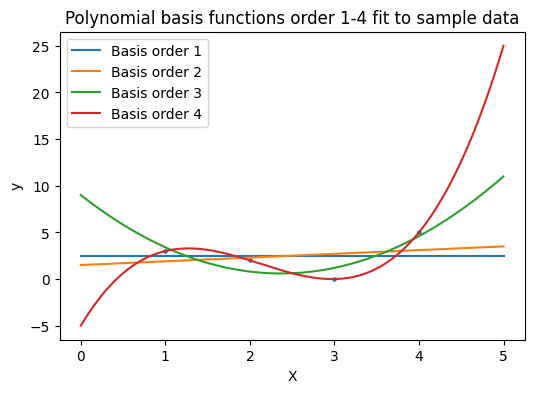

In [80]:
plt.figure(figsize=(6,4))

# loop through range 1-4 to generate feature space and optimal weights for each basis vector of order 1-4
# {1}, {1, x}, {1, x, x^2}, {1, x, x^2, x^3}
for k in range(1, 5):
    
    # build feature space and find weights; append to list to store
    phi, w = linear_regression(X, y, k, poly_feature_space)
    weights_list.append(w)
    
    # calculate fitted y values from the sample X data
    pred_sample = fit_poly(w, X)
    
    # calculate mse and add to corresponding dictionary key
    mse_dict["Basis "+str(k+1)] = np.average((y-pred_sample)**2)
    
    # calculate predicted y values for 'all' x using optimised weights
    pred = fit_poly(w, x_axis)
    plt.plot(x_axis, pred, label="Basis order "+str(k))
    
# show plot of four curves overlaying sample data 
plt.scatter(X, y, s=5)
plt.legend()
plt.title("Polynomial basis functions order 1-4 fit to sample data")
plt.xlabel("X")
plt.ylabel("y")
plt.savefig("q1a_plot.png")
plt.show()

### 1b. Equations of fitted basis functions

In [84]:
for weights in weights_list:
    print(np.round(weights, 2).tolist())

[2.5]
[1.5, 0.4]
[9.0, -7.1, 1.5]
[-5.0, 15.17, -8.5, 1.33]


\begin{alignat*}{2}
    &\{1\}:\quad &&y=2.5 \\
    &\{1, x\}:\quad &&y=1.5+0.4x \\
    &\{1, x, x^2\}:\quad &&y=9-7.1x+1.5x^2 \\
    &\{1, x, x^2, x^3\}:\quad &&y=-5+15.17x-8.5x^2+1.33x^3
\end{alignat*}

### 1c.

In [482]:
# convert mse dictionary to dataframe and show
mse_df = pd.DataFrame.from_dict(mse_dict, orient='index', columns=['MSE'])
print(mse_df)

                  MSE
Basis 1  3.250000e+00
Basis 2  3.050000e+00
Basis 3  8.000000e-01
Basis 4  2.089627e-23


### 2ai.

In [123]:
# generate 30 random data points using given sigma
sigma = 0.07
X_sample, y_sample = generate_sin_data(sigma, 30)

In [124]:
# create 'continuous data' for plotting full curve
x_axis = np.linspace(0,1,1000)
y_true = np.sin(2*np.pi*x_axis)**2

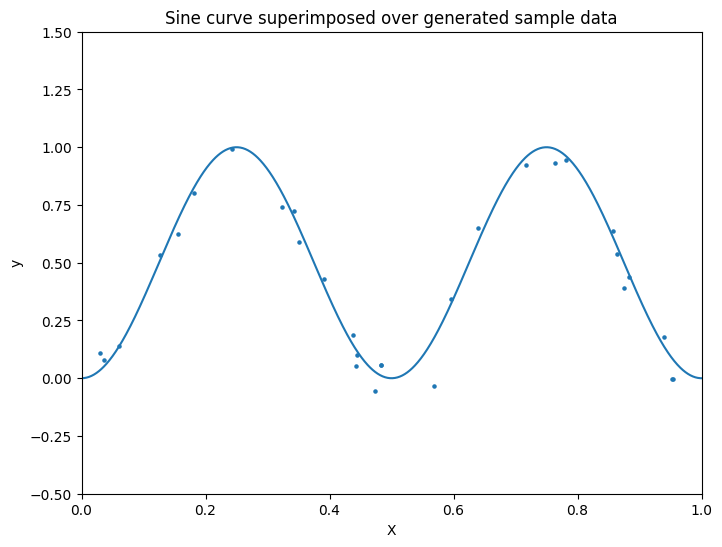

In [125]:
# plot full curve with sample overlay
plt.figure(figsize=(8,6))
plt.scatter(X_sample, y_sample, s=5)
plt.title("Sine curve superimposed over generated sample data")
plt.xlabel("X")
plt.ylabel("y")
plt.plot(x_axis, y_true)
plt.ylim(-0.5,1.5)
plt.xlim(0,1)
plt.savefig("q2ai_sine-data.png")
plt.show()

### 2aii.

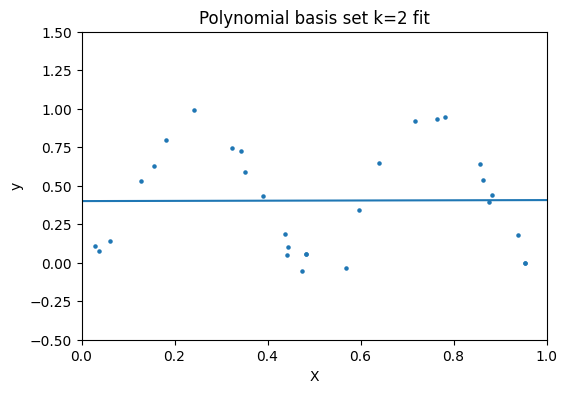

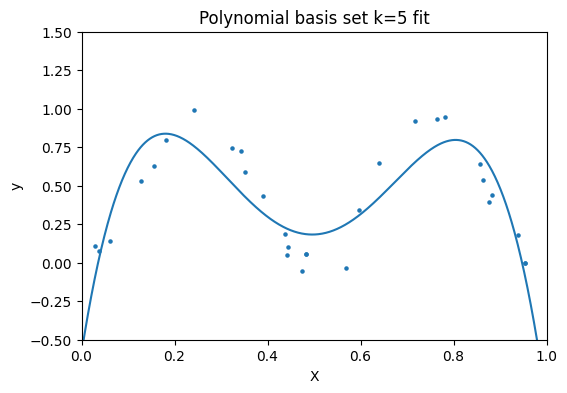

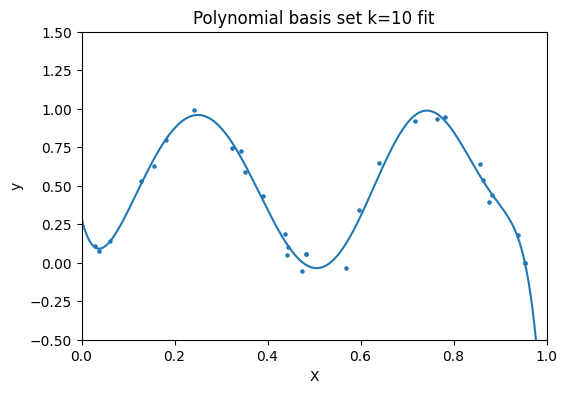

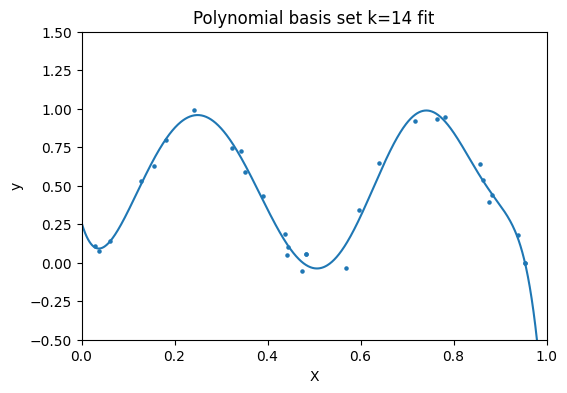

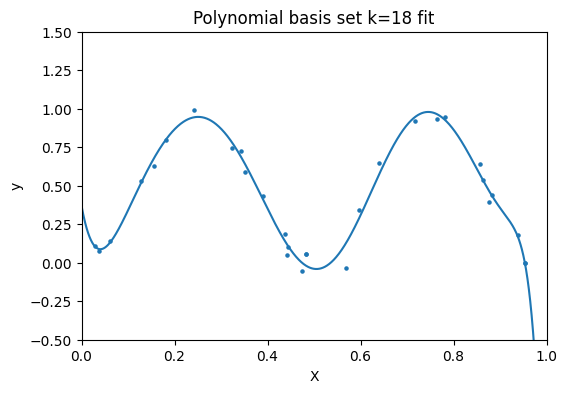

In [126]:
# perform linear regression for basis functions of order 2, 5, 10, 14, and 18
orders = [2, 5, 10, 14, 18]
for k in range(len(orders)):
    
    # build feature space of dimensions {len(X_sample), orders[k]} and find weights array {k, 1}
    phi, w = linear_regression(X_sample, y_sample, orders[k], poly_feature_space)
    
    # use weights to make predictions
    pred = fit_poly(w, x_axis)
    
    # plot sample data points with fitted polynomial basis overlay
    plt.figure(figsize=(6,4))
    plt.title(f"Polynomial basis set k={orders[k]} fit")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.plot(x_axis, pred)
    plt.scatter(X_sample, y_sample, s=5)
    plt.ylim(-0.5,1.5)
    plt.xlim(0,1)
    plt.savefig(f"q2aii_basis-{orders[k]}.png")
    plt.show()

### 2b.

In [127]:
# initialise empty lists to store weight vectors for 2b
weights_list = []

In [128]:
# initialise empty mse list for sample data 
mse_sample = []

# repeat process in 2a. for all polynomial feature spaces of order 1-18
orders18 = range(1, 19)
for k in orders18:

    # build feature space of dimensions {len(X_sample), k} and find weights array {k, 1}
    phi, w = linear_regression(X_sample, y_sample, k, poly_feature_space)
    weights_list.append(w)
    
    # use weights to make predictions and determine mse
    pred_sample = fit_poly(w, X_sample)
    mse_sample.append(np.average((y_sample-pred_sample)**2))

In [129]:
# calculate log mse for each basis
log_mse_sample = np.log(mse_sample)

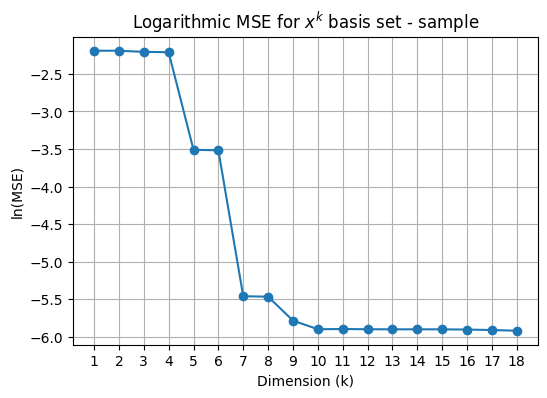

In [131]:
# plot the log mse against dimension of basis function used
plt.figure(figsize=(6, 4))
plt.title("Logarithmic MSE for "r"$x^k$"" basis set - sample")
plt.xlabel("Dimension (k)")
plt.ylabel("ln(MSE)")
plt.xticks(orders18)
plt.plot(orders18, log_mse_sample, marker='o')
plt.savefig("q2b_poly-lnmse-sample.png")
plt.grid()
plt.show()

### 2c.

In [132]:
# generate 1000 unseen test data points
X_test, y_test = generate_sin_data(sigma, 1000)

In [133]:
# initialise empty mse list for test data
mse_test = []

# perform linear regression on generated X test data using weights calculated in 2b. 
# repeat for all polynomial fits up to order 18 and calculate the mse using generated y test data
for w in weights_list: 
    pred_test = fit_poly(w, X_test)
    mse_test.append(np.average((y_test-pred_test)**2))

In [134]:
# calculate log mse for test data
log_mse_test = np.log(mse_test)

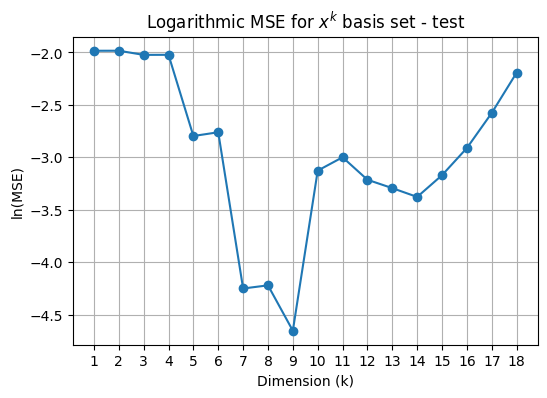

In [136]:
# plot log mse from the test data against dimension of basis function used 
plt.figure(figsize=(6, 4))
plt.title("Logarithmic MSE for "r"$x^k$"" basis set - test")
plt.xlabel("Dimension (k)")
plt.ylabel("ln(MSE)")
plt.xticks(orders18)
plt.plot(orders18, log_mse_test, marker='o')
plt.grid()
plt.savefig("q2c_poly-lnmse-test.png")
plt.show()

### 2d.

In [140]:
# initialise empty matrix of dimensions {100, 18} to store mse values of 18 basis functions over 100 runs 
mse_train_all = np.zeros([100, 18])
mse_test_all = np.zeros([100, 18])

# perform 100 runs of linear regression using polynomial feature spaces with basis functions order 1-18
runs = 100
for r in range(runs):
    
    # generate new train/test splits each run
    X_train, y_train = generate_sin_data(sigma, 30)
    X_test, y_test = generate_sin_data(sigma, 1000)
    
    for k in range(0,18): 
        
        # build feature space of dimensions {len(X_train), k+1} and find weights array {k+1, 1}
        phi, w = linear_regression(X_train, y_train, k+1, poly_feature_space)
        
        # make predictions and record mse for train and test
        pred_train = fit_poly(w, X_train)
        mse_train = np.average((y_train-pred_train)**2)
        mse_train_all[r,k] = mse_train

        pred_test = fit_poly(w, X_test)
        mse_test = np.average((y_test-pred_test)**2)
        mse_test_all[r,k] = mse_test

In [141]:
# calculate the log average mse over 100 runs 
logavg_mse_train = np.log(np.average(mse_train_all, axis=0))
logavg_mse_test = np.log(np.average(mse_test_all, axis=0))

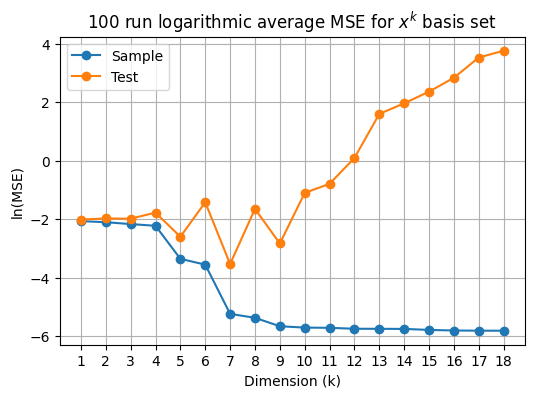

In [144]:
# plot the log average mse for train and test against dimension of basis function used
plt.figure(figsize=(6, 4))
plt.title("100 run logarithmic average MSE for "r"$x^k$"" basis set")
plt.xlabel("Dimension (k)")
plt.ylabel("ln(MSE)")
plt.plot(orders18, logavg_mse_train, marker='o', label='Sample') 
plt.plot(orders18, logavg_mse_test, marker='o', label='Test') 
plt.xticks(orders18)
plt.legend()
plt.grid()
plt.savefig("q2d_poly-lnmse-100.png")
plt.show()

### 3.

In [155]:
# intialise empty weight lists for sine basis
sin_weights_list = []

# intialise list to store sine mse results
sin_mse_sample = []

# fit linear regression using sine basis functions up to order 18
orders18 = range(1, 19)
for k in orders18:
    
    # build feature space of dimensions {len(X_sample), k} and find weights array {k, 1}
    phi, w = linear_regression(X_sample, y_sample, k, sin_feature_space)
    sin_weights_list.append(w)
    
    # make predictions using optimal weights and record mse
    pred_sample = fit_sin(w, X_sample)
    sin_mse_sample.append(np.average((y_sample-pred_sample)**2))

In [156]:
# calculate log of mse results    
logsin_mse_sample = np.log(sin_mse_sample)

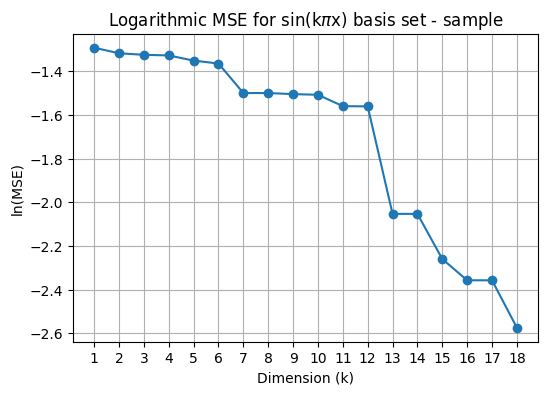

In [157]:
# plot log average mse for sample against dimension of basis function used
plt.figure(figsize=(6, 4))
plt.title("Logarithmic MSE for sin(k"r"$\pi$""x) basis set - sample")
plt.xlabel("Dimension (k)")
plt.ylabel("ln(MSE)")
plt.xticks(orders18)
plt.plot(orders18, logsin_mse_sample, marker='o')
plt.grid()
plt.savefig("q3_sin-lnmse-sample.png")
plt.show()

In [158]:
# initliase list to store test mse results for sine basis
sin_mse_test = []

# apply linear regression to test data and append mse results to list 
for sin_weights in sin_weights_list: 
    pred_test = fit_sin(sin_weights, X_test)
    sin_mse_test.append(np.average((y_test-pred_test)**2))

In [159]:
# calculate log of test mse results    
logsin_mse_test = np.log(sin_mse_test)

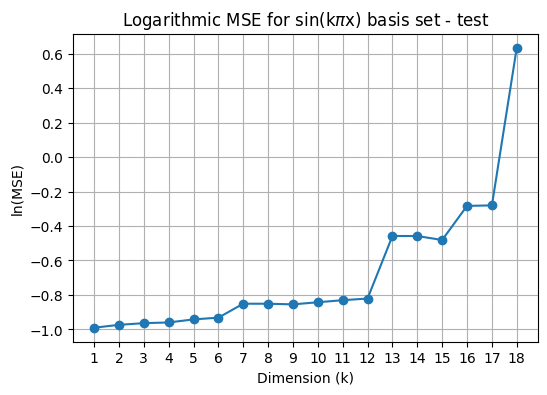

In [160]:
# plot the log average mse for test against dimension of sine basis function used
plt.figure(figsize=(6, 4))
plt.title("Logarithmic MSE for sin(k"r"$\pi$""x) basis set - test")
plt.xlabel("Dimension (k)")
plt.ylabel("ln(MSE)")
plt.xticks(orders18)
plt.plot(orders18, logsin_mse_test, marker='o')
plt.grid()
plt.savefig("q3_sin-lnmse-test.png")
plt.show()

In [164]:
# initliase matrices to store mse results for 18 basis functions over 100 runs 
sin_mse_sample_all = np.zeros([100, 18])
sin_mse_test_all = np.zeros([100, 18])

# repeat linear regression process for randomly sampled train/test data over 100 runs
runs = 100
for r in range(runs):
    
    # generate new train/test splits each run
    X_train, y_train = generate_sin_data(sigma, 30)
    X_test, y_test = generate_sin_data(sigma, 1000)
    
    for k in range(0,18):
        
        # build feature space of dimensions {len(X_sample), k+1} and find weights array {k+1, 1}
        phi, w = linear_regression(X_sample, y_sample, k+1, sin_feature_space)
        
        # make predictions and record mse
        pred_sample = fit_sin(w, X_sample)
        sin_mse_sample_all[r,k] = np.average((y_sample-pred_sample)**2)

        pred_test = fit_sin(w, X_test)
        sin_mse_test_all[r,k] = np.average((y_test-pred_test)**2)

In [165]:
# calculate the log of the 100 run average mse for each basis  
logavgsin_mse_sample = np.log(np.average(sin_mse_sample_all, axis=0))
logavgsin_mse_test = np.log(np.average(sin_mse_test_all, axis=0))

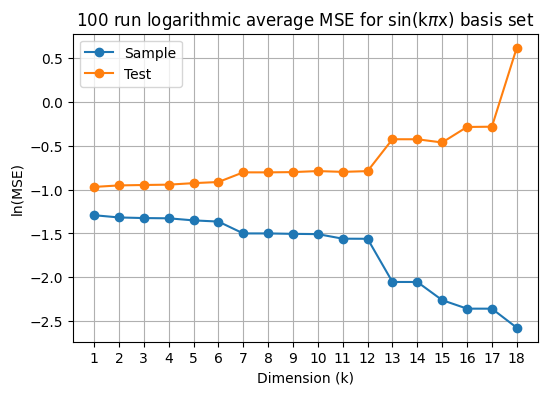

In [167]:
# plot the log average mse for train and test against dimension of sine basis function used
plt.figure(figsize=(6, 4))
plt.title("100 run logarithmic average MSE for sin(k"r"$\pi$""x) basis set")
plt.xlabel("Dimension (k)")
plt.ylabel("ln(MSE)")
plt.plot(orders18, logavgsin_mse_sample, marker='o', label='Sample') 
plt.plot(orders18, logavgsin_mse_test, marker='o', label='Test') 
plt.xticks(orders18)
plt.legend()
plt.grid()
plt.savefig("q3_sin-lnmse-100.png")
plt.show()

## 1.2 Filtered Boston Housing and Kernels

### 4a.

In [168]:
# import module to perform train/test splits
from sklearn.model_selection import train_test_split

In [170]:
# read in data and split input/output data
data = pd.read_csv("boston_housing.csv")
X = data.drop(columns='MEDV').to_numpy()
y = data['MEDV'].to_numpy()
y = y.reshape(-1, 1)

In [171]:
# initialise empty dictionary to store average mse (and standard deviation) for train and test
results_dict = {}

In [180]:
# initialise empty lists to store mse results
mse_total_train_const = []
mse_total_test_const = []

# perform 20 runs of naive regression utilising an array of ones for the input data
for i in range(20):
 
    # different random split of train/test data for each run
    X_train_const, X_test_const, y_train_const, y_test_const = train_test_split(X, y, test_size=1/3) 
    
    # produce array of ones matching the length of the train/test splits
    ones_train = np.ones([len(X_train_const), 1])
    ones_test = np.ones([len(X_test_const), 1])
    
    # find optimal weights for regression using the vector of ones as the feature space
    w = optimal_weights(ones_train, y_train_const)
    
    # evaluate regression using (w^T@X)^T=X^T@w to avoid reshaping results array in mse calculation
    pred_train_const = ones_train@w
    pred_test_const = ones_test@w
    
    # calculate mse for train and test data and append to lists
    mse_total_train_const.append(np.average((y_train_const-pred_train_const)**2))
    mse_total_test_const.append(np.average((y_test_const-pred_test_const)**2))

In [181]:
# calculate average mse and std    
mse_train_const_avg = np.average(mse_total_train_const).round(2)
mse_train_const_sd = np.std(mse_total_train_const).round(2)
mse_test_const_avg = np.average(mse_total_test_const).round(2)
mse_test_const_sd = np.std(mse_total_test_const).round(2)

In [189]:
# store results of naive regression in the results dictionary
results_dict["Naive Regression"] = {
    'Train': str(mse_train_const_avg)+"+/-"+str(mse_train_const_sd),
    'Test': str(mse_test_const_avg)+"+/-"+str(mse_test_const_sd)
}

### 4b.

The constant obtained in question 4a. is the average value of the y data used in the regression. This is clear from the matrix calculation. The dot product within the inverse is between a $1\times n$ row vector of ones and $n\times1$ column vector of ones resulting in a singular value of value $n$ ($n$ being the length of the data). This value is then inversed and dotted with a row vector of ones producing a row vector of length $n$ with each element equal to $\frac{1}{n}$. The dot product between this row vector and the column vector of y values performs $\sum^n_{i=1}{\frac{1}{n}y_i}=\frac{1}{n}\sum^n_{i=1}{y_i}$ - the average of the y values.

### 4c.

In [183]:
# add constant bias term to X data using array of ones
ones_X = np.ones([len(X), 1])
X_bias = np.append(ones_X, X, axis=1)

# repeat linear regression isolating each attribute (plus the bias term)   
for col in range(1,13):
    
    # initialise empty lists to store results of mse from 20 repeats
    mse_total_train_col = []
    mse_total_test_col = []
    
    # repeat linear regression for 20 runs for each attribute (plus bias term)
    for i in range(20):
        
        # use a different random split each run
        X_col_train, X_col_test, y_train_col, y_test_col = train_test_split(X_bias[:,[0,col]], y, test_size=0.66) 
        
        # calculate optimal weights 
        w = optimal_weights(X_col_train, y_train_col)
        
        # evaluate regression using (w^T@X)^T=X^T@w to avoid reshaping results array in mse calculation
        pred_train_col = X_col_train@w
        pred_test_col = X_col_test@w
         
        # calculate mse for train and test data and append to lists
        mse_total_train_col.append(np.average((y_train_col-pred_train_col)**2))
        mse_total_test_col.append(np.average((y_test_col-pred_test_col)**2))
    
    # calculate average mse and std across the 20 runs       
    mse_train_col_avg = np.average(mse_total_train_col).round(2)
    mse_train_col_sd = np.std(mse_total_train_col).round(2)
    mse_test_col_avg = np.average(mse_total_test_col).round(2)
    mse_test_col_sd = np.std(mse_total_test_col).round(2)

    # store results for each attribute in the results dictionary
    results_dict[f"Linear Regression (Attribute {col})"] = {
        'Train': str(mse_train_col_avg)+"+/-"+str(mse_train_col_sd), 
        'Test': str(mse_test_col_avg)+"+/-"+str(mse_test_col_sd)
    }

### 4d.

In [184]:
# initialise empty lists to store mse results for regression on all attributes
mse_total_train = []
mse_total_test = []

# perform linear regression using all features plus a bias term for 20 repeats
for i in range(20):
 
    # randomly split the data for each run and adding the bias term to the train and test input data
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.66) 
    ones_train = np.ones([len(X_train), 1])
    X_train = np.append(ones_train, X_train, axis=1)
    ones_test = np.ones([len(X_test), 1])
    X_test = np.append(ones_test, X_test, axis=1)
    
    # calculate optimal weights 
    w = optimal_weights(X_train, y_train)
    
    # evaluate regression using (w^T@X)^T=X^T@w to avoid reshaping results array in mse calculation    
    pred_train = X_train@w
    pred_test = X_test@w
    
    # calculate mse for train and test data and append to lists
    mse_total_train.append(np.average((y_train-pred_train)**2))
    mse_total_test.append(np.average((y_test-pred_test)**2))

In [185]:
# calculate average mse and standard deviation for the 20 repeats   
mse_train_avg = np.average(mse_total_train).round(2)
mse_train_sd = np.std(mse_total_train).round(2)
mse_test_avg = np.average(mse_total_test).round(2)
mse_test_sd = np.std(mse_total_test).round(2) 

In [186]:
# store results of linear regression using all attrubutes in the results dictionary
results_dict["Linear Regression (All Attributes)"] = {
    'Train': str(mse_train_avg)+"+/-"+str(mse_train_sd),
    'Test': str(mse_test_avg)+"+/-"+str(mse_test_sd)
}

## 1.3 Kernelised Ridge Regression

In [423]:
import seaborn as sns

In [424]:
def calculate_alpha(K, y, gamma):
    """
    Function to calculate the optimal alpha vector for kernel ridge regression using the dual representation

    Parameters
    ----------
    K : ndarray
        kernel matrix
    y : ndarray
        output data
    gamma : float
        regularisation parameter

    Returns
    -------
    Alpha array with length matching the number of observations: ndarray

    """
    l = len(K)
    # use numpys built-in identity function to generate an identity matrix of dimensions {l, l}
    I = np.identity(l)
    # utilise numpys built-in inverse function to complete matrix calculation
    return np.linalg.inv(K+(gamma*l*I))@y

In [425]:
def gaussian_kernel(i, j, sigma):
    """
    Function to generate individual values of a Gaussian kernel with spread parameterised by sigma 

    Parameters
    ----------
    i : float
        ith value of X data
    j : float
        jth value of X data
    sigma : float
        parameter chracterising the spread of the Gaussian used to calculate te kernel

    Returns
    -------
    Kernel value representing the similairity between points i and j: float

    """
    # calculate the distance between input data using numpys built-in function for the euclidian norm
    norm = np.linalg.norm(i-j)
    # using the norm above to return values for the gaussian kernel
    return np.exp(-(norm**2)/(2*sigma**2))

In [426]:
def kernel_matrix(X1, X2, sigma):
    """
    Function to build kernel matrix using Gaussian kernel function on all pairs of X data.

    Parameters
    ----------
    X : ndarray
        data used to build the kernel
    l : int
        length of data
    sigma : float
        sigma used in the Gaussian kernel function

    Returns
    -------
    kernel : ndarray
        populated Gaussian kernel of size lxl.

    """
    # initialise an empty kernel matrix
    l1 = len(X1)
    l2 = len(X2)
    kernel = np.zeros([l1, l2])
    # iteratively assign values to the kernel matrix using the gaussian kernel function
    for i in range(l1):
        for j in range(l2):
            kernel[i][j] = gaussian_kernel(X1[i], X2[j], sigma)
    return kernel

In [1]:
def fit_y(alpha, X, t, kernel_function, sigma):
    """
    Function producing a single y prediction corresponding to test point t.

    Parameters
    ----------
    alpha : ndarray
        alpha vector
    X : ndarray
        X data
    t : float
        test data point
    sigma : float
        parameter of gaussian kernel

    Returns
    -------
    Predicition corresponding to test point t: float 

    """
    K_test = kernel_function(X, t, sigma)
    y_pred = K_test.T@alpha
    return y_pred
    # return individual predictions corresponding to the data point t using representer theorem
    # return np.sum([alpha[i]*gaussian_kernel(X[i], t, sigma) for i in range(len(alpha))])

### 5a.

In [471]:
# produce initial train/test splits using data from question 4
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.66) 

In [472]:
# create gamma/sigma parameter lists as described in the question
gamma_power = np.arange(-40, -25)
gamma_list = [2**int(i) for i in gamma_power]
sigma_power = np.arange(7, 13.5, 0.5)
sigma_list = [2**i for i in sigma_power]

In [473]:
# initliase best gamma/sigma and minimum error trackers
best_gamma = 0
best_sigma = 0
min_error = np.infty

In [474]:
# determine fold size for 5 fold cross validation
l = len(X_train)
k = 5
fold_size = l//k

In [475]:
# initliase empty mse matrix with rows representing gamma values and columns sigma values
mse_matrix = np.zeros([len(gamma_list), len(sigma_list)])

# loop through all values of gamma and sigma and fit kernel ridge regression
# use the same train and test samples for each combination of parameters
for g in range(len(gamma_list)):
    for s in range(len(sigma_list)):
        
        mse = []
        
        # perform 5 fold cross validation to fit kernel ridge regresison
        for fold in range(k):

            start = fold*fold_size
            end = (fold+1)*fold_size
            
            # generate splits for cross validation
            X_train_cv = np.concatenate((X_train[:start], X_train[end:]), axis=0)
            y_train_cv = np.concatenate((y_train[:start], y_train[end:]), axis=0)
            X_test_cv = X_train[start:end]
            y_test_cv = y_train[start:end]
            
            # generate kernel matrix using X train cv split and current sigma
            l_cv = len(X_train_cv)
            kernel_cv = kernel_matrix(X_train_cv, l_cv, sigma_list[s])
            
            # calculate alpha vector using generated kernel, y train cv split, and current gamma                       
            alpha_cv = calculate_alpha(kernel_cv, y_train_cv, gamma_list[g])
            
            # fit test cv data using alpha vector
            y_pred = []
            for i in range(len(X_test_cv)):
                elem = fit_y(alpha_cv, X_train_cv, X_test_cv[i], sigma_list[s]) 
                y_pred.append(elem)
            
            # convert predictions to column vector and calculate mse
            # must reshape predictions array for mse calculation to work elementwise
            mse.append(np.average((y_test_cv-np.array(y_pred).reshape(-1,1))**2))
        
        # average mse calculation over 5 folds and assign to mse matrix
        mean_mse = np.average(mse)
        mse_matrix[g,s] = mean_mse
        
        # if mse is lower than current lowest error, update sigma, gamma and minimum error
        if mean_mse < min_error:
            best_gamma = gamma_list[g]
            best_sigma = sigma_list[s]
            min_error = mean_mse

### 5b.

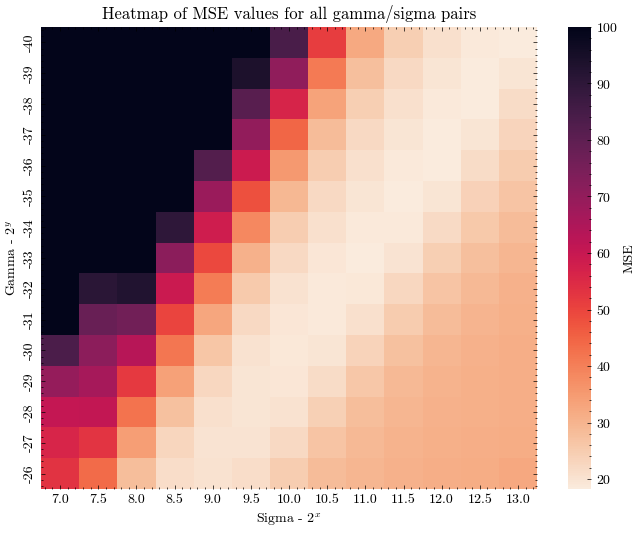

In [476]:
# plot mse vs sigma and gamma as a heatmap   
plt.figure(figsize=(8,6))
fig = sns.heatmap(mse_matrix, xticklabels=sigma_power, yticklabels=gamma_power, vmax=100,
                  cmap=sns.cm.rocket_r, cbar_kws={'label': 'MSE'})
plt.title("Heatmap of MSE values for all gamma/sigma pairs")
plt.xlabel("Sigma - "r"$2^x$")
plt.ylabel("Gamma - "r"$2^y$")
plt.savefig("q5b_mse_heatmap.png")
plt.show(fig)

### 5c.

In [448]:
# build optimal kernel using train data and best sigma
best_kernel = kernel_matrix(X_train, l, best_sigma)

In [449]:
# create optimal alpha vector using above optimal kernel and best gamma                     
best_alpha = calculate_alpha(best_kernel, y_train, best_gamma)

In [450]:
# calculate predictions and mse of the train data using created alpha vector
train_pred = []
for i in range(len(X_train)):
    elem = fit_y(best_alpha, X_train, X_train[i], best_sigma) 
    train_pred.append(np.sum(elem))

# must reshape predictions array for mse calculation to work elementwise
mse_train = np.average((y_train-np.array(train_pred).reshape(-1,1))**2)
print(mse_train)

9.190234630833661


In [451]:
# repeat above for test data
test_pred = []
for i in range(len(X_test)):
    elem = fit_y(best_alpha, X_train, X_test[i], best_sigma) 
    test_pred.append(elem) 

# must reshape predictions array for mse calculation to work elementwise
mse_test = np.average((y_test-np.array(test_pred).reshape(-1,1))**2) 
print(mse_test)

15.050058842830326


### 5d.

In [468]:
# initliase empty mse lists to store results of 20 repeats
mse_train_20 = []
mse_test_20 = []

# iniitialise empty lists to store best gamma/sigma pair for each run of 20
best_simga_list = []
best_gamma_list =[]

# repeat process in b for 20 iterations
for i in range(20):
    
    # different random split of data each run
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.66) 
    
    best_gamma = 0
    best_sigma = 0

    min_error = np.infty
    
    # loop through all values of gamma and sigma and fit kernel ridge regression
    # use the same train and test samples for each combination of parameters
    for g in range(len(gamma_list)):
        for s in range(len(sigma_list)):

            mse = []

            # perform 5 fold cross validation to fit kernel ridge regresison
            for fold in range(k):

                start = fold*fold_size
                end = (fold+1)*fold_size

                # generate splits for cross validation
                X_train_cv = np.concatenate((X_train[:start], X_train[end:]), axis=0)
                y_train_cv = np.concatenate((y_train[:start], y_train[end:]), axis=0)
                X_test_cv = X_train[start:end]
                y_test_cv = y_train[start:end]

                # generate kernel matrix using X train cv split and current sigma
                l_cv = len(X_train_cv)
                kernel_cv = kernel_matrix(X_train_cv, l_cv, sigma_list[s])

                # calculate alpha vector using generated kernel, y train cv split, and current gamma                       
                alpha_cv = calculate_alpha(kernel_cv, y_train_cv, gamma_list[g])

                # fit test cv data using alpha vector
                y_pred = []
                for i in range(len(X_test_cv)):
                    elem = fit_y(alpha_cv, X_train_cv, X_test_cv[i], sigma_list[s]) 
                    y_pred.append(elem)

                # convert predictions to column vector and calculate mse
                # must reshape predictions array for mse calculation to work elementwise
                mse.append(np.average((y_test_cv-np.array(y_pred).reshape(-1,1))**2))

            # average mse calculation over 5 folds and assign to mse matrix
            mean_mse = np.average(mse)

            # if mse is lower than current lowest error, update sigma, gamma and minimum error
            if mean_mse < min_error:
                best_gamma = gamma_list[g]
                best_sigma = sigma_list[s]
                min_error = mean_mse
    
    # append best gamma/sigma of run to lists
    best_simga_list.append(best_sigma)
    best_gamma_list.append(best_gamma)            
    
    # generate best kernel and alpah vector of run
    best_kernel = kernel_matrix(X_train, l, best_sigma)
    best_alpha = calculate_alpha(best_kernel, y_train, best_gamma)

    # calculate predictions using optimal alpha found in the run
    train_pred = []
    for i in range(len(X_train)):
        elem = fit_y(best_alpha, X_train, X_train[i], best_sigma) 
        train_pred.append(np.sum(elem))

    # calculate mse and append to list
    mse_train_20.append(np.average((y_train-np.array(train_pred).reshape(-1,1))**2))

    # repeat above for test data
    test_pred = []
    for i in range(len(X_test)):
        elem = fit_y(best_alpha, X_train, X_test[i], best_sigma) 
        test_pred.append(elem) 

    mse_test_20.append(np.average((y_test-np.array(test_pred).reshape(-1,1))**2))

In [463]:
# calculate the average mse and corresponding standard deviation               
mse_train_avg = np.average(mse_train_20).round(2)
mse_train_sd = np.std(mse_train_20).round(2)
mse_test_avg = np.average(mse_test_20).round(2)
mse_test_sd = np.std(mse_test_20).round(2)

In [464]:
# add results of kernel ridge regression to results dict  
results_dict["Kernel Ridge Regression"] = {'Train': str(mse_train_avg)+"+/-"+str(mse_train_sd),
                                    'Test': str(mse_test_avg)+"+/-"+str(mse_test_sd)} 

In [465]:
results_df = pd.DataFrame.from_dict(results_dict).T

In [466]:
results_df

,Train,Test
Naive Regression,83.12+/-9.53,85.39+/-4.93
Linear Regression (Attribute 1),67.85+/-10.5,76.25+/-6.59
Linear Regression (Attribute 2),67.91+/-7.96,77.19+/-4.14
Linear Regression (Attribute 3),64.06+/-10.07,65.75+/-5.4
Linear Regression (Attribute 4),79.09+/-8.19,84.97+/-3.84
Linear Regression (Attribute 5),70.59+/-10.66,69.07+/-5.43
Linear Regression (Attribute 6),47.24+/-7.9,42.75+/-4.01
Linear Regression (Attribute 7),67.95+/-13.43,75.45+/-7.23
Linear Regression (Attribute 8),75.53+/-10.12,82.11+/-5.84
Linear Regression (Attribute 9),72.55+/-9.62,72.63+/-4.83
